In [88]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

In [89]:
class CustomEnv:
    def __init__(self):

        # a 3x3 grid as the environment
        self.grid = np.zeros((6, 6))
        self.grid_size = (6, 6)

        # define initial position
        self.agent_position = (5, 0)

        self.path = self.generate_path()
        self.path_index = 0  # To keep track of the agent's position in the path

        # track battery status (1 = alive, 0 = dead)
        self.battery_status = 1

    def generate_path(self):
        path = []
        rows, cols = self.grid_size #top row and left column = 0

        dead_position = (2, 0) #where battery dies (can only die left edge of grid)
        self.battery_status = 1

        # Start at the bottom-left corner of the grid (start position)
        current_position = (rows - 1, 0)

        # Loop to move right and left while moving up after each row
        while current_position != 0 and self.battery_status == 1: #while current position isn't at top row (top row = 0)

            # Move right until we hit the right border
            for col in range(current_position[1], cols):
                path.append((current_position[0], col))

            # Move up one row if not yet on the top row
            if current_position[0] > 0:
                current_position = (current_position[0] - 1, cols - 1)  # Move up and to the far right
            else:
                break

            # Move left until we hit the left border
            for col in range(current_position[1], -1, -1):
                path.append((current_position[0], col))

                if (current_position[0], col) == dead_position: # "battery died"
                    #battery = 0
                    self.battery_status = 0 #update battery status to dead
                    break

            # Move up one row if not yet on the top row
            if current_position[0] > 0:
                current_position = (current_position[0] - 1, 0)  # Move up and to the far left
            else:
                break

        # Move down back to start position after battery dies
        for row in range(current_position[0] + 1, rows):
            path.append((row, dead_position[1]))

        # Start position reached, battery recharged
        self.battery_status = 1 # reset battery status

        # Move back up to where battery died
        for row in range(rows - 1, dead_position[0] - 1, -1): #(start, stop, step)
            path.append((row, dead_position[1]))

        # Restart zig zag path after battery charge sequence

        while current_position != 0 and self.battery_status == 1: #while current position isn't at top row (top row = 0)

            # Move right until we hit the right border
            for col in range(current_position[1], cols):
                path.append((current_position[0], col))

            # Move up one row if not yet on the top row
            if current_position[0] > 0:
                current_position = (current_position[0] - 1, cols - 1)  # Move up and to the far right
            else:
                break

            # Move left until we hit the left border
            for col in range(current_position[1], -1, -1):
                path.append((current_position[0], col))

            # Move up one row if not yet on the top row
            if current_position[0] > 0:
                current_position = (current_position[0] - 1, 0)  # Move up and to the far left
            else:
                break

        # Go back down to start position after all area is covered
        for row in range(current_position[0] + 1, rows):
            path.append((row, 0)) #hard coded column value

        return path

    def step(self):
        # Move the agent along the path
        if self.path_index < len(self.path) - 1:
            self.path_index += 1
            self.agent_position = self.path[self.path_index]

    def reset(self):
        # Reset agent to original position
        self.agent_position = (5, 0)
        self.battery_status = 1 # reset battery to alive

    def render(self):
        self.grid = np.zeros((6, 6))  # Reset grid to zeros before rendering
        self.grid[self.agent_position] = 1  # Mark the agent's position

        return self.grid
   

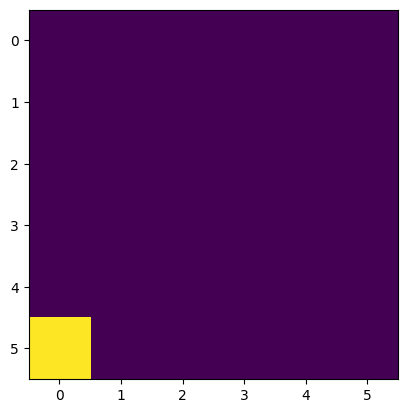

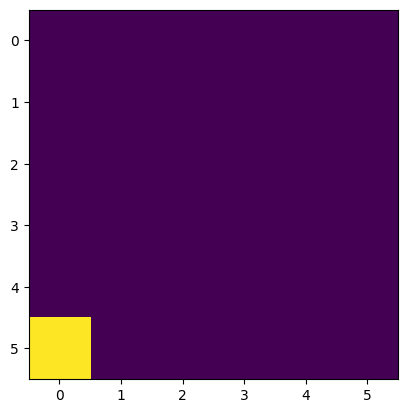

In [90]:
# Create environment
env = CustomEnv()
env.reset()

# display
plt.imshow(env.render())

# Iterate through the path and move the agent
for i in range(len(env.path)):
    # Perform a step in the path (move to the next position)
    env.step()

    # Render the grid and update the display
    plt.imshow(env.render()) # using custom colormap
    display.clear_output(wait=True)  # Clear the output so the display updates
    display.display(plt.gcf())  # Display the updated grid

    time.sleep(0.1)  # Pause for a moment to make the movement visible